### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
trainX[1].shape

(28, 28)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
trainY_cat=tf.keras.utils.to_categorical(trainY)

In [8]:
testY_cat=tf.keras.utils.to_categorical(testY)

In [9]:
trainX.shape

(60000, 28, 28)

In [10]:
print(trainY_cat.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [11]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

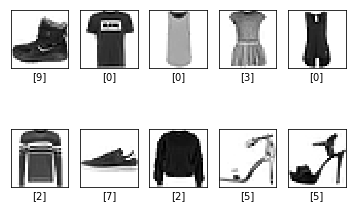

In [12]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel([trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [29]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
# model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [30]:
model.fit(trainX, trainY_cat, validation_data=(testX,testY_cat), epochs=5, batch_size=1)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 92s 2ms/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 83s 1ms/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [31]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [32]:
model.fit(trainX, trainY_cat, validation_data=(testX,testY_cat), epochs=5, batch_size=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 106s 2ms/sample - loss: 2.3085 - acc: 0.0992 - val_loss: 13.8638 - val_acc: 0.1389
Epoch 2/5
60000/60000 [==============================] - 115s 2ms/sample - loss: 2.3067 - acc: 0.0998 - val_loss: 13.9627 - val_acc: 0.1326
Epoch 3/5
60000/60000 [==============================] - 115s 2ms/sample - loss: 2.3059 - acc: 0.0987 - val_loss: 13.9198 - val_acc: 0.1351
Epoch 4/5
60000/60000 [==============================] - 103s 2ms/sample - loss: 2.3056 - acc: 0.0983 - val_loss: 13.8770 - val_acc: 0.1367
Epoch 5/5
60000/60000 [==============================] - 112s 2ms/sample - loss: 2.3053 - acc: 0.0998 - val_loss: 13.6890 - val_acc: 0.1486


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import sgd

model = Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(Dense(10, activation='softmax'))

sg = sgd(lr=0.001)



In [24]:
model.compile(optimizer=sg,loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(trainX, trainY_cat, validation_data=(testX,testY_cat), epochs=5, batch_size=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 93s 2ms/step - loss: 2.3034 - acc: 0.0989 - val_loss: 15.2026 - val_acc: 0.0566
Epoch 2/5
60000/60000 [==============================] - 93s 2ms/step - loss: 2.3034 - acc: 0.1001 - val_loss: 15.2686 - val_acc: 0.0527
Epoch 3/5
60000/60000 [==============================] - 100s 2ms/step - loss: 2.3033 - acc: 0.1002 - val_loss: 15.2568 - val_acc: 0.0529
Epoch 4/5
60000/60000 [==============================] - 96s 2ms/step - loss: 2.3033 - acc: 0.0990 - val_loss: 15.1478 - val_acc: 0.0600
Epoch 5/5
60000/60000 [==============================] - 97s 2ms/step - loss: 2.3032 - acc: 0.0999 - val_loss: 15.1868 - val_acc: 0.0577


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [27]:
#Initialize Sequential model
model = Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(Dense(100, activation='sigmoid'))

model.add(Dense(100, activation='sigmoid'))

model.add(Dense(10, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))

sg = sgd(lr=0.03)

#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer=sg, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [28]:
model.fit(trainX, trainY_cat, validation_data=(testX,testY_cat), epochs=5, batch_size=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 120s 2ms/step - loss: 2.3101 - acc: 0.0989 - val_loss: 2.3068 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 119s 2ms/step - loss: 2.3098 - acc: 0.0992 - val_loss: 2.3092 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 128s 2ms/step - loss: 2.3092 - acc: 0.1003 - val_loss: 2.3082 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 128s 2ms/step - loss: 2.3092 - acc: 0.0995 - val_loss: 2.3092 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 130s 2ms/step - loss: 2.3097 - acc: 0.1001 - val_loss: 2.3077 - val_acc: 0.1000


In [29]:
test_loss, test_acc = model.evaluate(testX, testY_cat)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 65us/step
Test accuracy: 0.1


### Run the model

In [30]:
model.predict(testX)


array([[0.0979726 , 0.09286574, 0.0882769 , ..., 0.09792773, 0.1118647 ,
        0.11086754],
       [0.09787688, 0.093064  , 0.08837312, ..., 0.09782831, 0.11171815,
        0.11074077],
       [0.09797906, 0.09300793, 0.08813807, ..., 0.0979068 , 0.11187642,
        0.11089375],
       ...,
       [0.09797937, 0.09290835, 0.08823296, ..., 0.09799341, 0.1119221 ,
        0.11086097],
       [0.09782086, 0.09292772, 0.08823719, ..., 0.09786832, 0.11191998,
        0.11102726],
       [0.0979716 , 0.09274682, 0.08824873, ..., 0.09794056, 0.11192589,
        0.11101795]], dtype=float32)